## Import libraries and load dataset 

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load given dataset

In [2]:
products = pd.read_csv(r'products.csv')
clients = pd.read_csv(r'clients.csv')

products.head()

,ProductCode,ProductDescription,InsuranceType
0,P5DA,Personal Health Insurance,Health
1,RIBP,Comprehensive Vehicle Insurance,Vehicle | Life | Property
2,8NN1,Comprehensive Accident Insurance,Life | Property
3,7POT,Home Insurance,Property
4,66FJ,Life Insurance,Life


In [3]:
clients.head()

,ClientID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,01-02-2019,F,M,1987,1X1H,2A7I,T4MS,0.0,0.0,...,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0
1,CP5S02H,01-06-2019,F,M,1981,UAOD,2A7I,T4MS,0.0,0.0,...,0.0,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0
2,2YKDILJ,01-06-2013,M,U,1991,748L,QZYX,90QI,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
3,2S9E81J,01-08-2019,M,M,1990,1X1H,BP09,56SI,0.0,0.0,...,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
4,BHDYVFT,01-08-2019,M,M,1990,748L,NO3L,T4MS,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.8,2.5,0.0,0.0


### Check data shape, columns and data types

In [4]:
products.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductCode         21 non-null     object
 1   ProductDescription  21 non-null     object
 2   InsuranceType       21 non-null     object
dtypes: object(3)
memory usage: 4.3 KB


The products dataset has:
- 3 features (3 categorical)
- 21 observations
- Dataset fits in 4.3 KB

In [5]:
clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientID                  29132 non-null  object 
 1   join_date                 29130 non-null  object 
 2   sex                       29132 non-null  object 
 3   marital_status            29132 non-null  object 
 4   birth_year                29132 non-null  int64  
 5   branch_code               29132 non-null  object 
 6   occupation_code           29132 non-null  object 
 7   occupation_category_code  29132 non-null  object 
 8   P5DA                      29132 non-null  float64
 9   RIBP                      29132 non-null  float64
 10  8NN1                      29132 non-null  float64
 11  7POT                      29132 non-null  float64
 12  66FJ                      29132 non-null  float64
 13  GYSR                      29132 non-null  float64
 14  SOP4  

The clients dataset has:
- 29 features (7 categorical, 22 numerical)
- 29132 observations
- Dataset fits in 16.8 MB

### Check for missing values

In [6]:
products.isnull().mean().sort_values(ascending=False)

ProductCode           0.0
ProductDescription    0.0
InsuranceType         0.0
dtype: float64

In [7]:
clients.isnull().mean().sort_values(ascending=False)

join_date                   0.000069
ClientID                    0.000000
RVSZ                        0.000000
GHYX                        0.000000
J9JW                        0.000000
JZ9D                        0.000000
JWFN                        0.000000
QBOL                        0.000000
K6QO                        0.000000
FM3X                        0.000000
BSTQ                        0.000000
AHXO                        0.000000
N2MW                        0.000000
LJR9                        0.000000
PYUQ                        0.000000
SOP4                        0.000000
GYSR                        0.000000
66FJ                        0.000000
7POT                        0.000000
8NN1                        0.000000
RIBP                        0.000000
P5DA                        0.000000
occupation_category_code    0.000000
occupation_code             0.000000
branch_code                 0.000000
birth_year                  0.000000
marital_status              0.000000
s

- ['join_date'] has some missing values that may need to be imputed.

### Creating combined dataset of Products and Clients

In [8]:
products.head()

,ProductCode,ProductDescription,InsuranceType
0,P5DA,Personal Health Insurance,Health
1,RIBP,Comprehensive Vehicle Insurance,Vehicle | Life | Property
2,8NN1,Comprehensive Accident Insurance,Life | Property
3,7POT,Home Insurance,Property
4,66FJ,Life Insurance,Life


In [9]:
clients.head()

,ClientID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,01-02-2019,F,M,1987,1X1H,2A7I,T4MS,0.0,0.0,...,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0
1,CP5S02H,01-06-2019,F,M,1981,UAOD,2A7I,T4MS,0.0,0.0,...,0.0,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0
2,2YKDILJ,01-06-2013,M,U,1991,748L,QZYX,90QI,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
3,2S9E81J,01-08-2019,M,M,1990,1X1H,BP09,56SI,0.0,0.0,...,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
4,BHDYVFT,01-08-2019,M,M,1990,748L,NO3L,T4MS,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.8,2.5,0.0,0.0


#### Unpivoting clients dataset in order to merge with products data

In [10]:
clients_unpivot = clients.melt(id_vars=['ClientID','join_date','sex','marital_status','birth_year','branch_code','occupation_code','occupation_category_code'],
                               value_vars=['P5DA', 'RIBP', '8NN1','7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
                                               'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'],
                               var_name='ProductCode',
                               value_name='TakenProduct'
                                )
clients_unpivot.head()

,ClientID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,ProductCode,TakenProduct
0,4WKQSBB,01-02-2019,F,M,1987,1X1H,2A7I,T4MS,P5DA,0.0
1,CP5S02H,01-06-2019,F,M,1981,UAOD,2A7I,T4MS,P5DA,0.0
2,2YKDILJ,01-06-2013,M,U,1991,748L,QZYX,90QI,P5DA,0.0
3,2S9E81J,01-08-2019,M,M,1990,1X1H,BP09,56SI,P5DA,0.0
4,BHDYVFT,01-08-2019,M,M,1990,748L,NO3L,T4MS,P5DA,0.0


#### Merge Products and Clients

In [11]:
# Removing 'join_date' column as it is not required for further analysis
ProductClients = pd.merge(products,clients_unpivot, on='ProductCode').drop(columns='join_date')
ProductClients

,ProductCode,ProductDescription,InsuranceType,ClientID,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,TakenProduct
0,P5DA,Personal Health Insurance,Health,4WKQSBB,F,M,1987,1X1H,2A7I,T4MS,0.0
1,P5DA,Personal Health Insurance,Health,CP5S02H,F,M,1981,UAOD,2A7I,T4MS,0.0
2,P5DA,Personal Health Insurance,Health,2YKDILJ,M,U,1991,748L,QZYX,90QI,0.0
3,P5DA,Personal Health Insurance,Health,2S9E81J,M,M,1990,1X1H,BP09,56SI,0.0
4,P5DA,Personal Health Insurance,Health,BHDYVFT,M,M,1990,748L,NO3L,T4MS,0.0
...,...,...,...,...,...,...,...,...,...,...,...
611767,ECY3,Business Interruption Insurance,General | Life,8SBA93U,F,M,1974,748L,2A7I,T4MS,0.0
611768,ECY3,Business Interruption Insurance,General | Life,Y73ETTO,M,M,1987,XX25,Q6J6,90QI,0.0
611769,ECY3,Business Interruption Insurance,General | Life,MVXG2LC,M,M,1985,BOAS,6PE7,T4MS,0.0
611770,ECY3,Business Interruption Insurance,General | Life,BUQ8DQN,M,M,1989,UAOD,2A7I,T4MS,0.0


### Data wrangling to transform pipe separated InsuranceType into individual rows

In [12]:
# Split pipe separated Types into individual columns
insurance_columns = ProductClients['InsuranceType'].str.split('|', expand=True )

# Concatenate with ProductClients df 
ProductClients_Ins_1 = pd.concat([ProductClients,insurance_columns], axis=1 ).drop(columns='InsuranceType')

# Unpivot the data
ProductClients_Ins = ProductClients_Ins_1.melt(id_vars=['ProductCode','ProductDescription','ClientID','sex','marital_status','birth_year','branch_code','occupation_code','occupation_category_code','TakenProduct'], 
                                              value_vars=[0, 1, 2], 
                                              value_name='InsuranceType').dropna().drop(columns='variable')
# Remove whitespaces 
ProductClients_Ins.InsuranceType = ProductClients_Ins.InsuranceType.str.strip()
ProductClients_Ins.head()

,ProductCode,ProductDescription,ClientID,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,TakenProduct,InsuranceType
0,P5DA,Personal Health Insurance,4WKQSBB,F,M,1987,1X1H,2A7I,T4MS,0.0,Health
1,P5DA,Personal Health Insurance,CP5S02H,F,M,1981,UAOD,2A7I,T4MS,0.0,Health
2,P5DA,Personal Health Insurance,2YKDILJ,M,U,1991,748L,QZYX,90QI,0.0,Health
3,P5DA,Personal Health Insurance,2S9E81J,M,M,1990,1X1H,BP09,56SI,0.0,Health
4,P5DA,Personal Health Insurance,BHDYVFT,M,M,1990,748L,NO3L,T4MS,0.0,Health


#### Deriving age from birth year

In [13]:
ProductClients_Ins['birth_year'] = datetime.now().year - ProductClients_Ins['birth_year']
ProductClients_Ins.rename(columns={'birth_year':'Age'}, inplace=True)
ProductClients_Ins.head()

,ProductCode,ProductDescription,ClientID,sex,marital_status,Age,branch_code,occupation_code,occupation_category_code,TakenProduct,InsuranceType
0,P5DA,Personal Health Insurance,4WKQSBB,F,M,37,1X1H,2A7I,T4MS,0.0,Health
1,P5DA,Personal Health Insurance,CP5S02H,F,M,43,UAOD,2A7I,T4MS,0.0,Health
2,P5DA,Personal Health Insurance,2YKDILJ,M,U,33,748L,QZYX,90QI,0.0,Health
3,P5DA,Personal Health Insurance,2S9E81J,M,M,34,1X1H,BP09,56SI,0.0,Health
4,P5DA,Personal Health Insurance,BHDYVFT,M,M,34,748L,NO3L,T4MS,0.0,Health


## Exploratory Data Analysis

### Understanding distribution of the features available 

In [14]:
# High level statistics for numerical variables

ProductClients_Ins.describe()

,Age,TakenProduct
count,728300.00000,728300.000000
mean,44.48294,0.244121
std,9.32545,0.867841
min,13.00000,0.000000
25%,37.00000,0.000000
50%,44.00000,0.000000
75%,51.00000,0.000000
max,92.00000,5.000000


- ['Age'] Clients who have taken insurance policies are 44 years of age on average. Age ranges from 13 to 92. Age has a normal distribution as mean is equal to median. Age can be binned into categories like 'Young', 'Middle-Aged', 'Senior', 'Senior Citizen'
- ['TakenProduct'] is having decimal value between 0 and 5. It is the target variable.

In [15]:
# High level statistics for categorical variables

ProductClients_Ins.describe(include='O')

,ProductCode,ProductDescription,ClientID,sex,marital_status,branch_code,occupation_code,occupation_category_code,InsuranceType
count,728300,728300,728300,728300,728300,728300,728300,728300,728300
unique,21,21,29132,2,8,15,233,6,5
top,RIBP,Comprehensive Vehicle Insurance,4WKQSBB,M,M,748L,2A7I,T4MS,General
freq,87396,87396,25,508225,572825,203400,177225,465475,233056


- ['occupation_code'] has 233 unique values which is high. We will drop ['occupation_code'] and use ['occupation_category_code'] for our analysis.

In [16]:
# Checking unique values in categorical columns

df = pd.DataFrame(ProductClients_Ins['marital_status'].value_counts())
df

,count
marital_status,
M,572825
S,81675
U,61850
W,7525
D,3375
R,850
P,175
f,25


- ['marital_status'] 'R', 'P' and 'f' can be grouped into 'Other' to reduce the number of categories.
- Unmarried 'U' and Single 'S' can also be combined

### Understanding Outliers using Boxplots

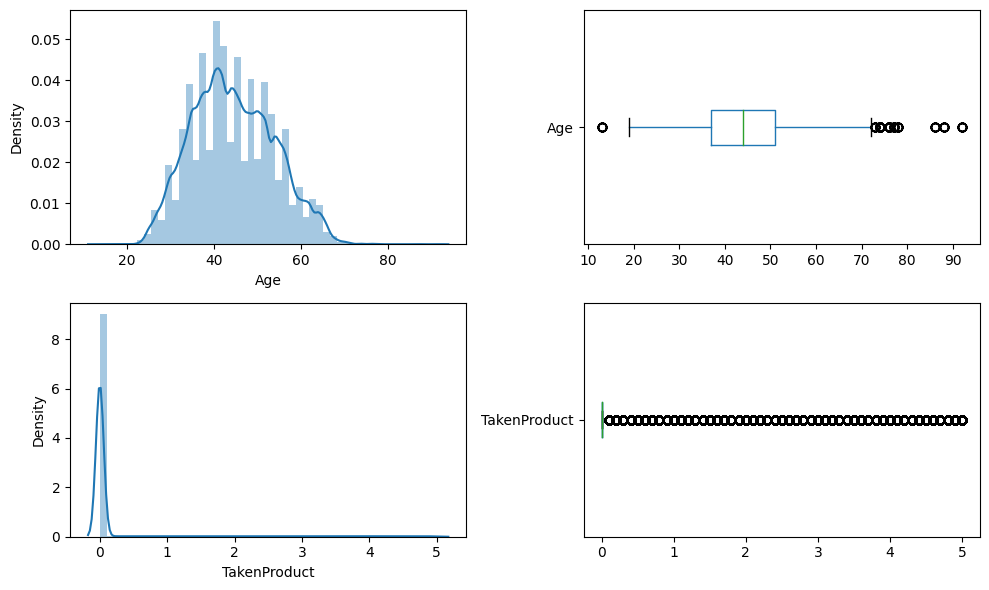

In [17]:
# Numerical columns with variance and distribution
numerical_features = list(ProductClients_Ins.select_dtypes(include=['float64', 'int64']).columns)

# Generate histograms and boxplots

fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(10,6))
for i, col in enumerate(numerical_features):
    sns.distplot(ProductClients_Ins[col], ax=axes[i, 0])
    ProductClients_Ins.boxplot(column=col, ax=axes[i, 1], grid=False, vert=False)

plt.tight_layout()
plt.show()

- From the distribution plot, we see that ['Age'] has almost normal distribution but with heavy tails indicating outliers.
The boxplot confirms the outliers. We can treat these outliers to lie within the acceptable range using Winsorizer.
- ['TakenProduct'] has a right tail with values ranging between 0 and 5. As this is the target variable, it does not need scaling and outlier treament.

#### 1. Treating outliers in Age

In [18]:
from feature_engine.outliers import Winsorizer

capper = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables='Age')
ProductClients_Ins_cap = capper.fit_transform(ProductClients_Ins)

Outlier treatment completed

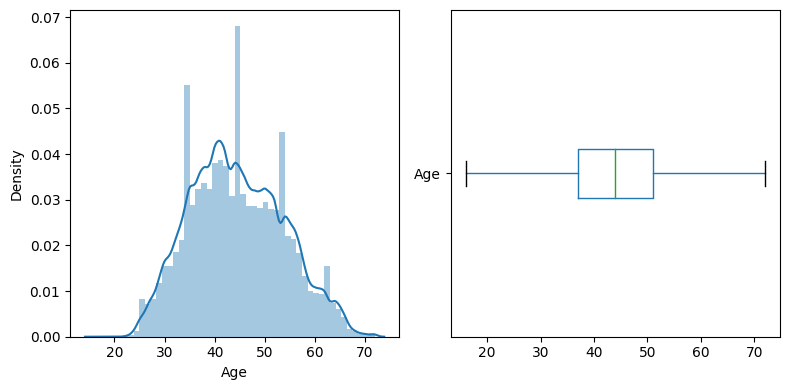

In [19]:
# Generate histograms and boxplots after Outlier treatment

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
for i, col in enumerate(['Age']):
    sns.distplot(ProductClients_Ins_cap[col], ax=axes[0])
    ProductClients_Ins_cap.boxplot(column=col, ax=axes[1], grid=False, vert=False)

plt.tight_layout()
plt.show()

#### 2. Create Age bins

In [20]:
ProductClients_Ins_cap.head()

,ProductCode,ProductDescription,ClientID,sex,marital_status,Age,branch_code,occupation_code,occupation_category_code,TakenProduct,InsuranceType
0,P5DA,Personal Health Insurance,4WKQSBB,F,M,37,1X1H,2A7I,T4MS,0.0,Health
1,P5DA,Personal Health Insurance,CP5S02H,F,M,43,UAOD,2A7I,T4MS,0.0,Health
2,P5DA,Personal Health Insurance,2YKDILJ,M,U,33,748L,QZYX,90QI,0.0,Health
3,P5DA,Personal Health Insurance,2S9E81J,M,M,34,1X1H,BP09,56SI,0.0,Health
4,P5DA,Personal Health Insurance,BHDYVFT,M,M,34,748L,NO3L,T4MS,0.0,Health


In [21]:
ProductClients_Ins_cap['Age'] = np.where(ProductClients_Ins_cap.Age<30,'Young', 
                                         np.where(ProductClients_Ins_cap.Age<50,'Middle-Aged',
                                         np.where(ProductClients_Ins_cap.Age<70,'Senior', 'Senior Citizen')))
ProductClients_Ins_cap.head()

,ProductCode,ProductDescription,ClientID,sex,marital_status,Age,branch_code,occupation_code,occupation_category_code,TakenProduct,InsuranceType
0,P5DA,Personal Health Insurance,4WKQSBB,F,M,Middle-Aged,1X1H,2A7I,T4MS,0.0,Health
1,P5DA,Personal Health Insurance,CP5S02H,F,M,Middle-Aged,UAOD,2A7I,T4MS,0.0,Health
2,P5DA,Personal Health Insurance,2YKDILJ,M,U,Middle-Aged,748L,QZYX,90QI,0.0,Health
3,P5DA,Personal Health Insurance,2S9E81J,M,M,Middle-Aged,1X1H,BP09,56SI,0.0,Health
4,P5DA,Personal Health Insurance,BHDYVFT,M,M,Middle-Aged,748L,NO3L,T4MS,0.0,Health


#### 3. Drop occupation_code

In [22]:
ProductClients_Ins_cap.drop(columns='occupation_code', inplace=True)

#### 4.  Convert ['marital_status'] 'R', 'P' and 'f' into 'Other' and 'U' to 'S'

In [23]:
ProductClients_Ins_cap['marital_status'] = np.where(ProductClients_Ins_cap.marital_status.isin (['R','P' ,'f']),'Other', 
                                                np.where(ProductClients_Ins_cap.marital_status=='U','S',ProductClients_Ins_cap.marital_status)
                                                )
ProductClients_Ins_cap.head()

,ProductCode,ProductDescription,ClientID,sex,marital_status,Age,branch_code,occupation_category_code,TakenProduct,InsuranceType
0,P5DA,Personal Health Insurance,4WKQSBB,F,M,Middle-Aged,1X1H,T4MS,0.0,Health
1,P5DA,Personal Health Insurance,CP5S02H,F,M,Middle-Aged,UAOD,T4MS,0.0,Health
2,P5DA,Personal Health Insurance,2YKDILJ,M,S,Middle-Aged,748L,90QI,0.0,Health
3,P5DA,Personal Health Insurance,2S9E81J,M,M,Middle-Aged,1X1H,56SI,0.0,Health
4,P5DA,Personal Health Insurance,BHDYVFT,M,M,Middle-Aged,748L,T4MS,0.0,Health


In [24]:
ProductClients_Ins_cap['marital_status'].unique()

array(['M', 'S', 'W', 'D', 'Other'], dtype=object)

### Total policies at Insurance-product level

In [25]:
# Create a dataframe that gives Insurance type & product wise number of clients who have taken that product

# Filter for clients who have taken 1 or more insurance products
clients_with_ins = ProductClients_Ins_cap[ProductClients_Ins_cap['TakenProduct']>0]

# Num Clients
Insurance_Product_summary = pd.DataFrame(clients_with_ins.groupby(['InsuranceType','ProductDescription'])['ClientID'].nunique()).rename(columns={'ClientID':'Num Clients'})

Insurance_Product_summary = Insurance_Product_summary.reset_index()
Insurance_Product_summary.head()

,InsuranceType,ProductDescription,Num Clients
0,General,Business Interruption Insurance,1095
1,General,Business Liability Insurance,6778
2,General,Credit Insurance,895
3,General,Cyber Insurance,21411
4,General,Marine Insurance,1415


### Total policies at Insurance Type level

In [26]:
# Create a dataframe that gives Insurance type wise number of products, number of policies

Insurance_summary = pd.DataFrame(clients_with_ins.groupby('InsuranceType')['ProductCode'].nunique()).rename(columns={'ProductCode':'NoOfProducts'})
Insurance_summary['NoOfPolicies'] = clients_with_ins.groupby('InsuranceType')['ClientID'].nunique()
Insurance_summary = Insurance_summary.reset_index().sort_values('NoOfProducts', ascending=False)
Insurance_summary.head()

,InsuranceType,NoOfProducts,NoOfPolicies
0,General,8,27105
3,Property,5,3174
1,Health,4,1017
2,Life,4,3133
4,Vehicle,4,26028


### Insurance types w.r.t. number of products and policies

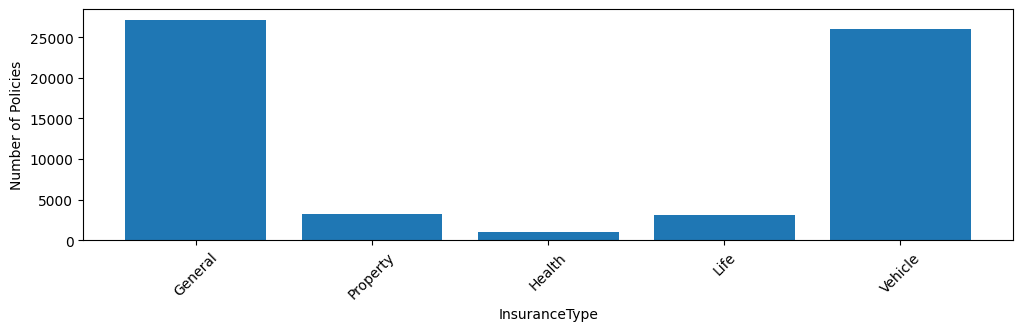

In [27]:
plt.figure(figsize=(12,3))
plt.bar(list(Insurance_summary['InsuranceType']), Insurance_summary['NoOfPolicies'])
plt.xticks(rotation=45)
plt.xlabel('InsuranceType')
plt.ylabel('Number of Policies')
plt.show()

- We infer that even though Property, Health and Life insurance have more products, they do not contribute to many policies i.e. clients.
- Vehicle insurance has fewer product offerings but still has more clients than Property, Health & Life insurance combined.

### Distribution of Insurance Types vs. Age

In [28]:
# Create temporary aggregated dataset for visualization
temp1 = pd.DataFrame(clients_with_ins.groupby(['InsuranceType', 'Age'])['ClientID'].nunique()).reset_index()\
        .rename(columns={'ClientID':'No_of_clients'})
temp1.head()

,InsuranceType,Age,No_of_clients
0,General,Middle-Aged,17800
1,General,Senior,8099
2,General,Senior Citizen,17
3,General,Young,1189
4,Health,Middle-Aged,550


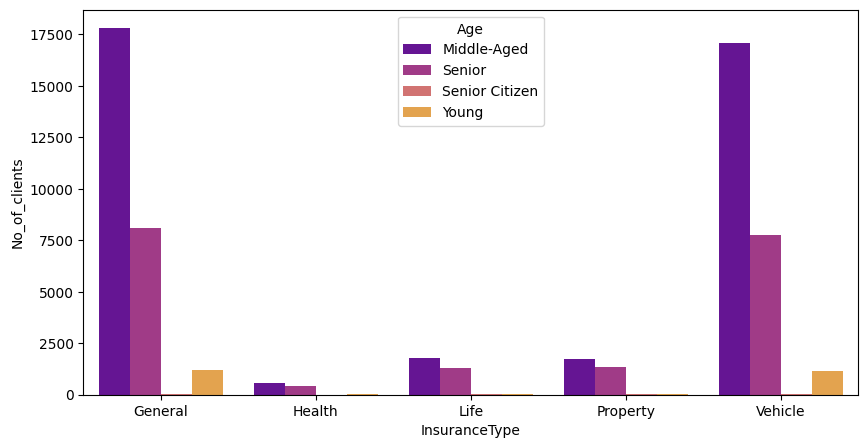

In [29]:
# Plot the chart
plt.figure(figsize=(10,5))
sns.barplot(data=temp1, x='InsuranceType', y='No_of_clients', hue='Age', palette='plasma')
plt.show()

- We see a huge proportion of middle aged people taking General insurance closely followed by Vehicle insurance.
- The young population generally takes Vehicle and General insurance.
- Life and Property insurance are mostly taken by Middle-aged and Senior folks.
- Health insurance is at an all time low across all age groups. We see that very few people are actually taking a health insurance plan.

In [30]:
ProductClients_Ins_cap.head()

,ProductCode,ProductDescription,ClientID,sex,marital_status,Age,branch_code,occupation_category_code,TakenProduct,InsuranceType
0,P5DA,Personal Health Insurance,4WKQSBB,F,M,Middle-Aged,1X1H,T4MS,0.0,Health
1,P5DA,Personal Health Insurance,CP5S02H,F,M,Middle-Aged,UAOD,T4MS,0.0,Health
2,P5DA,Personal Health Insurance,2YKDILJ,M,S,Middle-Aged,748L,90QI,0.0,Health
3,P5DA,Personal Health Insurance,2S9E81J,M,M,Middle-Aged,1X1H,56SI,0.0,Health
4,P5DA,Personal Health Insurance,BHDYVFT,M,M,Middle-Aged,748L,T4MS,0.0,Health


### Distribution of Health Insurance vs. Gender

In [31]:
# Create temporary aggregated dataset for visualization
temp2 = pd.DataFrame(ProductClients_Ins_cap.groupby(['InsuranceType','sex',
                                                     np.where(ProductClients_Ins_cap['TakenProduct']==0,'N','Y')                                                    
                                                    ])['ClientID'].nunique()).reset_index()\
        .rename(columns={'ClientID':'No_of_clients', 'level_2':'Insured?'})
temp2.head()

,InsuranceType,sex,Insured?,No_of_clients
0,General,F,N,8803
1,General,F,Y,8317
2,General,M,N,20329
3,General,M,Y,18788
4,Health,F,N,8803


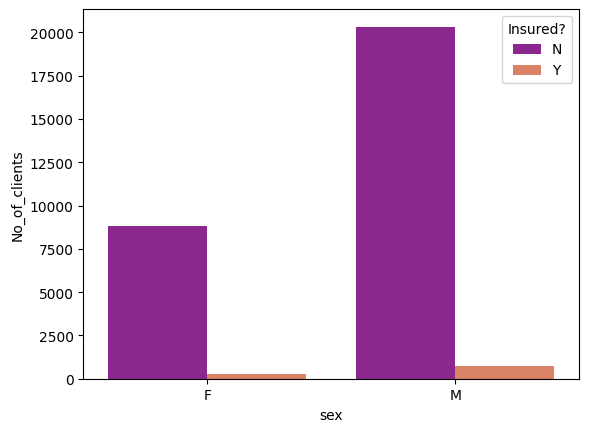

In [32]:
# Plot the chart for Health insurance
sns.barplot(data=temp2[(temp2['InsuranceType']=='Health')],x="sex", y='No_of_clients', hue='Insured?', palette='plasma')
plt.show()

- From the above graph, we infer that a vast majority of the Male client pool has not taken any kind of Health insurance.
- The proportion of Females who have not taken Health insurance is roughly half but is still quite large.
- We probably need to conduct campaigns for cross selling our health insurance products.

### Distribution of Insurance policies by Marital status

In [33]:
# Create temporary aggregated dataset for visualization
temp3 = pd.DataFrame(clients_with_ins.groupby(['InsuranceType', 'marital_status'])['ClientID'].nunique()).reset_index()\
        .rename(columns={'ClientID':'No_of_policies'})
temp3.sort_values('No_of_policies', ascending=False, inplace=True)
temp3.head()

,InsuranceType,marital_status,No_of_policies
1,General,M,22124
21,Vehicle,M,20496
23,Vehicle,S,5119
3,General,S,4525
18,Property,S,2109


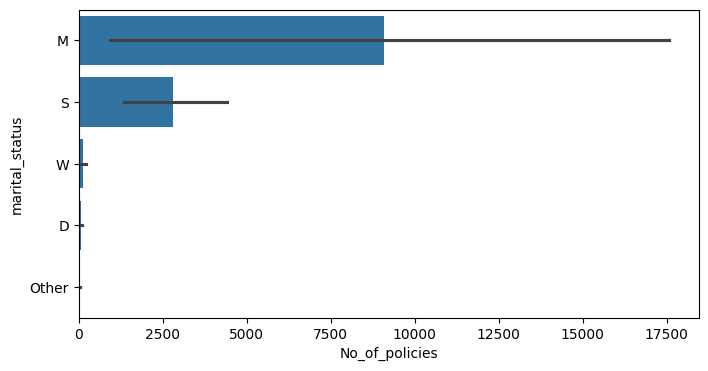

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(data=temp3, y='marital_status', x='No_of_policies')
plt.show()

- Seeing the distribution, we can infer that married people contribute the majority portion of total policies.
- Focus should be on retaining married people as clients and upselling/ cross-selling to single people.

### Finding unique clients and products 

In [35]:
print('Number of unique clients are: ', ProductClients_Ins_cap['ClientID'].nunique())
print('Number of unique products are: ', ProductClients_Ins_cap['ProductCode'].nunique())

Number of unique clients are:  29132
Number of unique products are:  21


### Unique Insurance types considered

In [36]:
print('List of unique insurance types are:')
ProductClients_Ins_cap['InsuranceType'].unique().tolist()

List of unique insurance types are:


['Health', 'Vehicle', 'Life', 'Property', 'General']

## Design the 3 different types of recommendation modules

### 1. Popularity-based recommender system

In [37]:
def popularity_based_recommendation(InsuranceType, minclients, numrecomm):
    g = InsuranceType
    t = minclients
    N = numrecomm

    # Create a subset of products for InsuranceType and minimum clients entered by user
    Productset_Popularity_1 = Insurance_Product_summary[(Insurance_Product_summary['InsuranceType']==g) & (Insurance_Product_summary['Num Clients']>=t)]

    # Add S.No to above subset by sorting on avg. movie rating in descending order    
    Productset_Popularity_1['S.No'] = Productset_Popularity_1.sort_values('Num Clients', ascending=False)\
                        .groupby('InsuranceType')\
                        .cumcount()+1

    # Rearrange column order for ease of understanding
    Productset_Popularity_1.drop(columns='InsuranceType')
    Productset_Popularity_1 = Productset_Popularity_1[['S.No','ProductDescription','Num Clients']]\
                            .rename(columns={'ProductDescription':'Product Description'})
    # Output dataframe that filters for number of recommendations that the user wants
    Productset_Popularity = Productset_Popularity_1[Productset_Popularity_1['S.No']<=N].sort_values('S.No')
    
    return Productset_Popularity

## 2. Content-based recommender system

### Step 1: Tf-idf Vectorizer

In [38]:
# Using TfidfVectorizer to find most significant insurance type for each produc

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english')

tf_matrix = tf.fit_transform(products['InsuranceType'])

In [39]:
# Shape of tfidf matrix output

tf_matrix.shape

(21, 5)

In [40]:
# Column names of tfidf matrix output

tf.get_feature_names_out()

array(['general', 'health', 'life', 'property', 'vehicle'], dtype=object)

In [41]:
# Viewing tfidf matrix output for 1st movie

tf_matrix[0].toarray()

array([[0., 1., 0., 0., 0.]])

### Step 2: Cosine similarity

In [42]:
# Calculating similarity between products using cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(tf_matrix) 

# Changing similarity of movie with itself from 1 to 0
np.fill_diagonal(product_similarity, 0)     

# Creating a dataframe
product_similarity_df = pd.DataFrame(product_similarity)
product_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.806326,0.548017,0.591472,0.591472,0.548017,0.591472,0.000000,0.0,...,0.0,0.591472,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470195
2,0.0,0.806326,0.000000,0.679647,0.733539,0.000000,0.679647,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583132
3,0.0,0.548017,0.679647,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.591472,0.733539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.794957
5,0.0,0.591472,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.548017,0.679647,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.591472,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.606666
9,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
product_similarity.shape

(21, 21)

### Step 3: Define the function

In [44]:
def content_based_recommendation(product, numrecomm):
    t = product
    N = int(numrecomm)

    global products
    
    # Fetch index of user input product from products dataframe
    index_t = products[products['ProductDescription']==t].index.tolist()  
    index_t = index_t[0] 

    # Adding similarity from product_similarity using index
    products['similarity'] = product_similarity_df.iloc[index_t]

    Productset_Content_1 = products.copy().sort_values('similarity', ascending=False)
    products= products.drop(columns='similarity')

    Productset_Content_1['Sl.No'] = range(1, len(Productset_Content_1)+1)
    Productset_Content_1 = Productset_Content_1[['Sl.No','ProductDescription']].rename(columns={'ProductDescription':'Product Description'})

    # Output dataframe that filters for number of recommendations that the user wants
    Productset_Content = Productset_Content_1[Productset_Content_1['Sl.No']<=N]

    # Removing the default integer index while printing the dataframe
    return Productset_Content

### 3. Collaborative-based recommender system

In [45]:
def collaborative_based_recommendation(clientID, numrecomm, simusers):
    u = clientID
    N = numrecomm
    k = simusers

# Create the dataframe containing list of products taken by the target client
    
    Collab_df = ProductClients[['ClientID','ProductCode','ProductDescription','TakenProduct']]
    
    client_taken = Collab_df[(Collab_df['ClientID']==u) & (Collab_df['TakenProduct']>0)]
    # client_taken.head()
    
    # Find peers who have taken the same products as the target client 
    peers = Collab_df[(Collab_df['ProductCode'].isin(client_taken['ProductCode'])) & (Collab_df['TakenProduct']>0)]      
    
    # Excluding target client from peer list
    peers = peers[peers['ClientID'] != u]
    peers.head()
    # print('There are ',peers['ClientID'].nunique(), ' clients who have taken the same products as the target user')
        
    # Grouping by ClientID to create sub dataframes for each client
    # This will help in quantifying the number of products that are common between each peer and the target client
    # Assumption is: Higher the number of common products taken, more similar are the clients 
    
    peers_grp = peers.groupby('ClientID')
    
    # Create Pearson Coefficient of Correlation to find clients similar to the target client based on products taken
    pearson_coef={}
    
    for name, peer in peers_grp:
    
        # Fetch only those target client products that the peer has taken
        client_peer_taken = client_taken[client_taken['ProductCode'].isin(peer['ProductCode'])]
        
        # Sort by product code
        client_peer_taken = client_peer_taken.sort_values('ProductCode')
        peer = peer.sort_values('ProductCode')
    
        # Add TakenProduct to a list
        client_taken_list = client_peer_taken['TakenProduct'].tolist()
        peer_taken_list = peer['TakenProduct'].tolist()
    
        # Calculate Pearson's coefficient
        if (len(client_taken_list)>1) & (len(peer_taken_list)>1):
            pearson_coef[name] = stats.pearsonr(client_taken_list, peer_taken_list).statistic
            
    # Convert dict to dataframe
    pearson_coef_df = pd.DataFrame.from_dict(pearson_coef, orient='index').fillna(0).reset_index().rename(columns={'index':'ClientID', 0:'SimilarityCoef'})
    # pearson_coef_df['SimilarityCoef'].value_counts()
    
    # Filter the above to get list of "K" similar clients
    pearson_coef_df = pearson_coef_df.sort_values('SimilarityCoef', ascending = False)[:k]
    
    # Fetching taken products for list of similar peers
    similar_peers = Collab_df[(Collab_df['ClientID'].isin(pearson_coef_df['ClientID'])) & (Collab_df['TakenProduct']>0)]
    
    # Exclude products that are already taken by the target client
    similar_peers = similar_peers[~similar_peers['ProductCode'].isin(client_taken['ProductCode'])]
    
    # Adding Similarity Coefficient
    similar_peers = similar_peers.merge(pearson_coef_df, on='ClientID')
    
    # The similar peers may have taken common products. In order to determine which are the top products to recommend,
    # we take weighted average of TakenProduct using SimilarityCoef as the weight
    
    similar_peers['wt_takenproduct'] = similar_peers['TakenProduct']*similar_peers['SimilarityCoef']

    
    # For each product, calculate the weighted average TakenProduct across all similar clients
    peer_recommended_products = pd.DataFrame(similar_peers.groupby(['ProductDescription'])[['wt_takenproduct','SimilarityCoef']].sum()).reset_index().rename(columns={'wt_takenproduct':'WeightedSum','SimilarityCoef':'SumOfWeights'})
    peer_recommended_products['WeightedAvgScore'] = peer_recommended_products['WeightedSum']/ peer_recommended_products['SumOfWeights']
    
    # Sorting in descending order of weighted average TakenProduct
    peer_recommended_products = peer_recommended_products.sort_values('WeightedAvgScore', ascending=False)
    peer_recommended_products['S.No'] = range(1,len(peer_recommended_products)+1)
    
    # Filter for top N peer recommended products 
    Productset_Collaborative = peer_recommended_products[peer_recommended_products['S.No']<=N]
    Productset_Collaborative = Productset_Collaborative[['S.No','ProductDescription']].rename(columns={'ProductDescription':'Product Description'})


    return Productset_Collaborative

## End of Code